# Visual Eigenvalues Demo
v1 - Fall 19: Neelesh Ramachandran



#### Context:

In this demo notebook, you'll have the opportunity to get some visual intuition into how the eigenvalues of a matrix govern that matrix's impact on an arbitrary vector! Suppose we have the following matrix:
$$A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}$$

The eigenvalues of this matrix can be calculated as follows: First, we form the matrix $A$ - $\lambda I$: 
$$A -\lambda I= \begin{bmatrix} a_{11} - \lambda & a_{12} \\ a_{21} & a_{22} - \lambda \end{bmatrix}$$

Then, we calculate the determinant of this matrix with the following formula: $[(a_{11} - \lambda ) * (a_{22} - \lambda)] - [a_{21} * a_{22}]$. This equation is referred to as the **characteristic polynomial**. Solving this quadratic equation (in higher dimensions, the polynimal will be of accordingly higher degree) for $\lambda$ (the roots) will yield the eigenvalues of the system..

The eigenvalues of a matrix essentially give the scaling factor for the associated eigenvector; for a more in-depth discussion of these concepts, check course notes and lecture.

#### TODO:

At the top, there's a section for you to define your initial vector. Then, you can observe how a matrix impacts this vector as it is multiplied repeatedly ($v$, $Av$, $A^2v$, ... $A^nv$).

Run the code block below and wait for a few seconds (up to 10) for the output plots to display themselves. If you find that the output cell is compressed and you have to scroll, then we recommend clicking somewhere to the left of the plots within the output cell; if you've done it correctly, the output cell should expand and show all the plots at once.

As you scroll top to bottom through the output, you'll notice that your initial vector will converge to the eigenvector. 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

[3. 2.]
[[1. 0.]
 [0. 1.]]


<IPython.core.display.Javascript object>


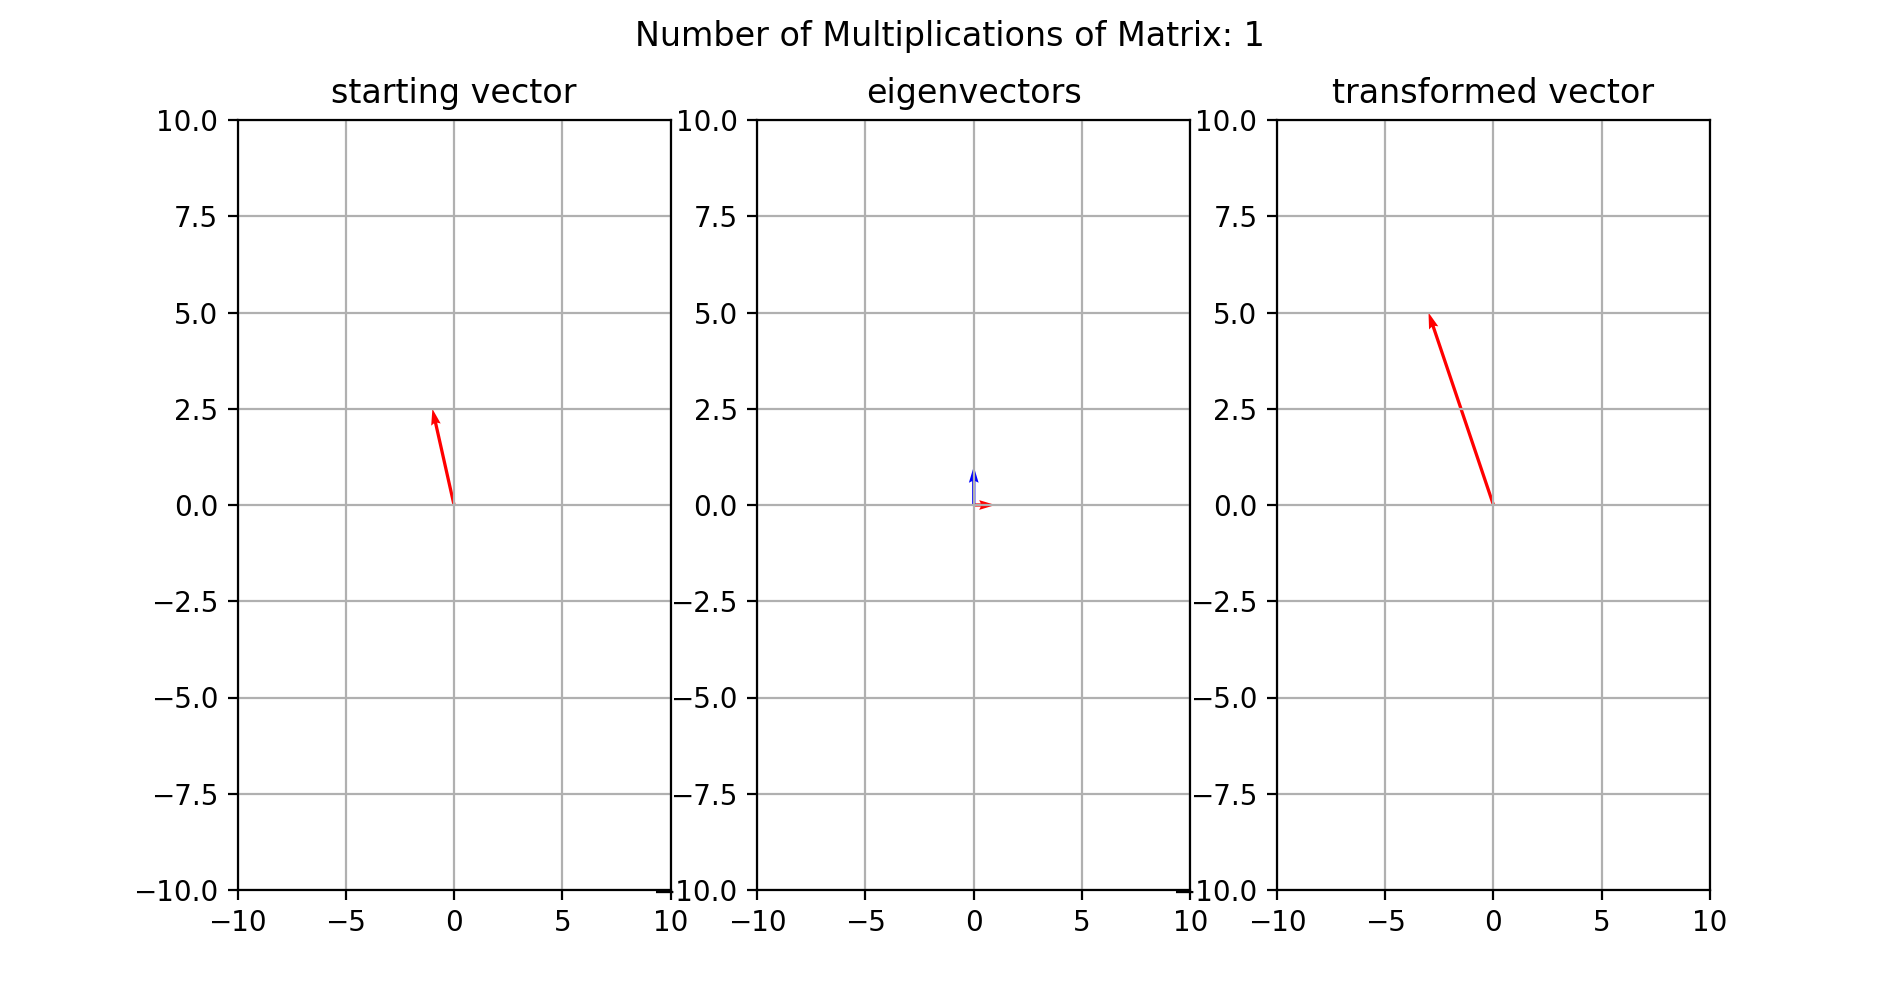

<IPython.core.display.Javascript object>


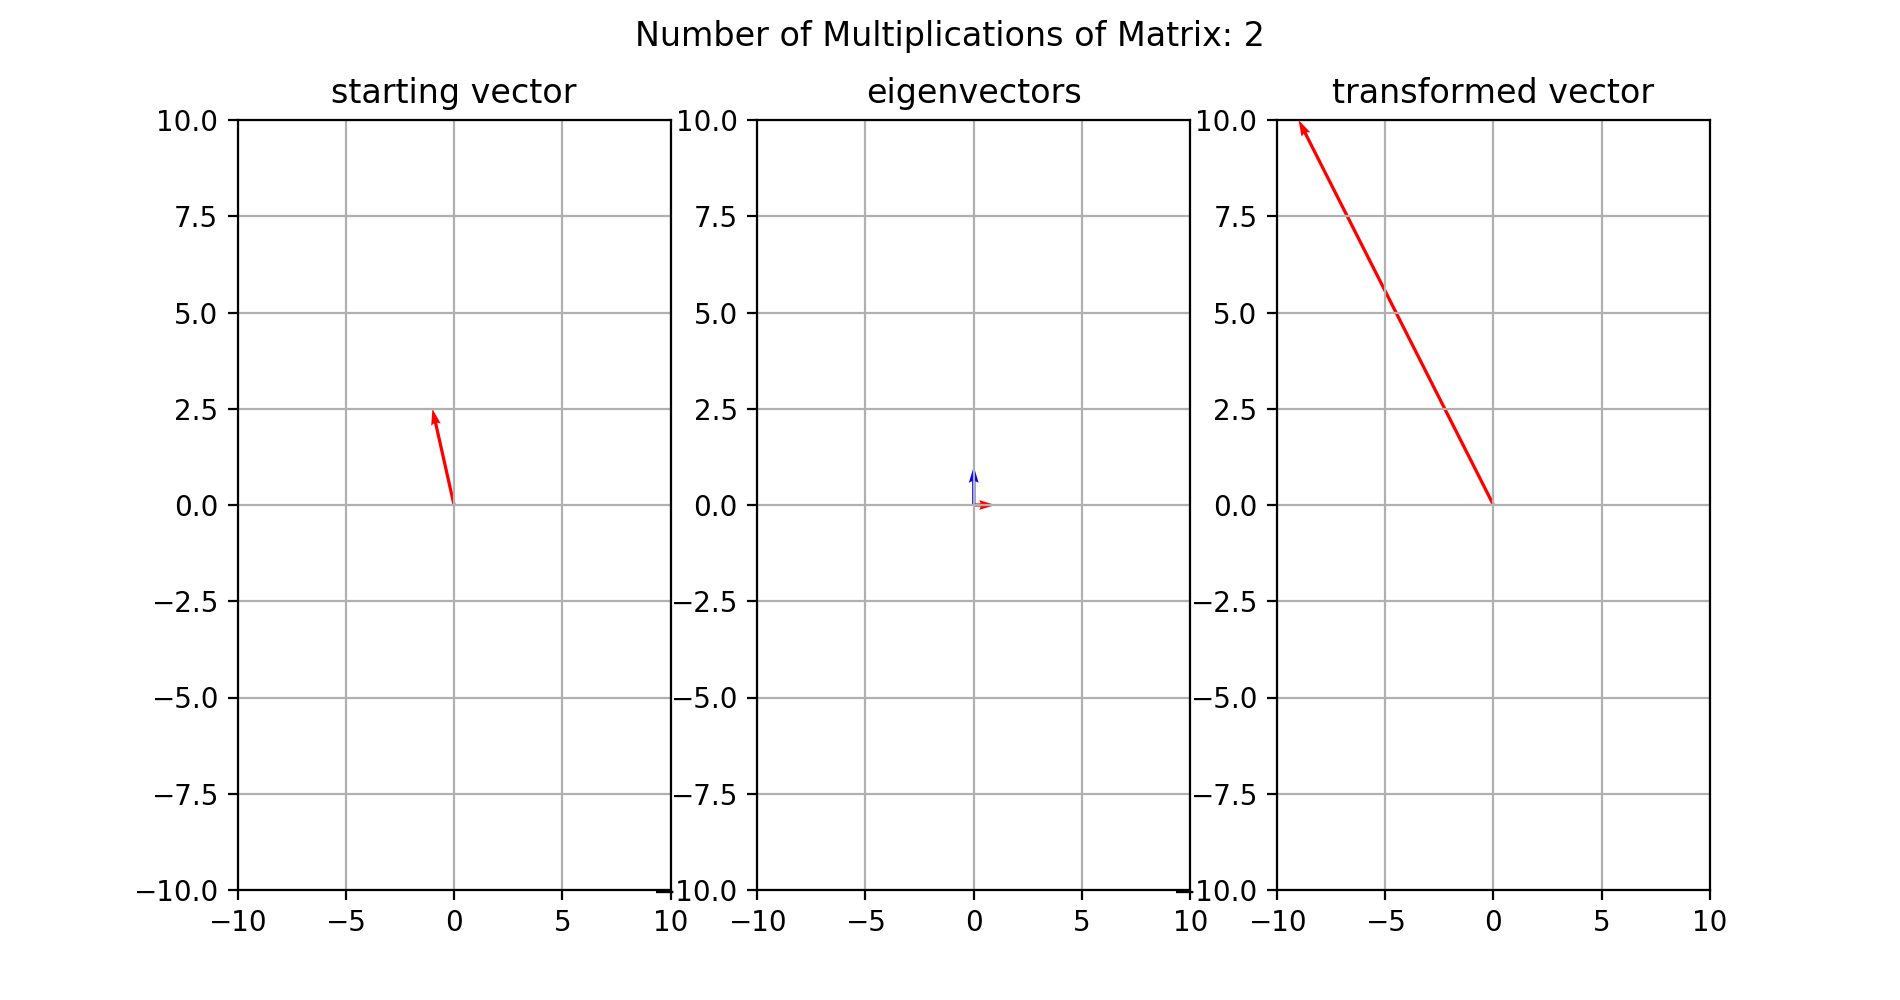

<IPython.core.display.Javascript object>


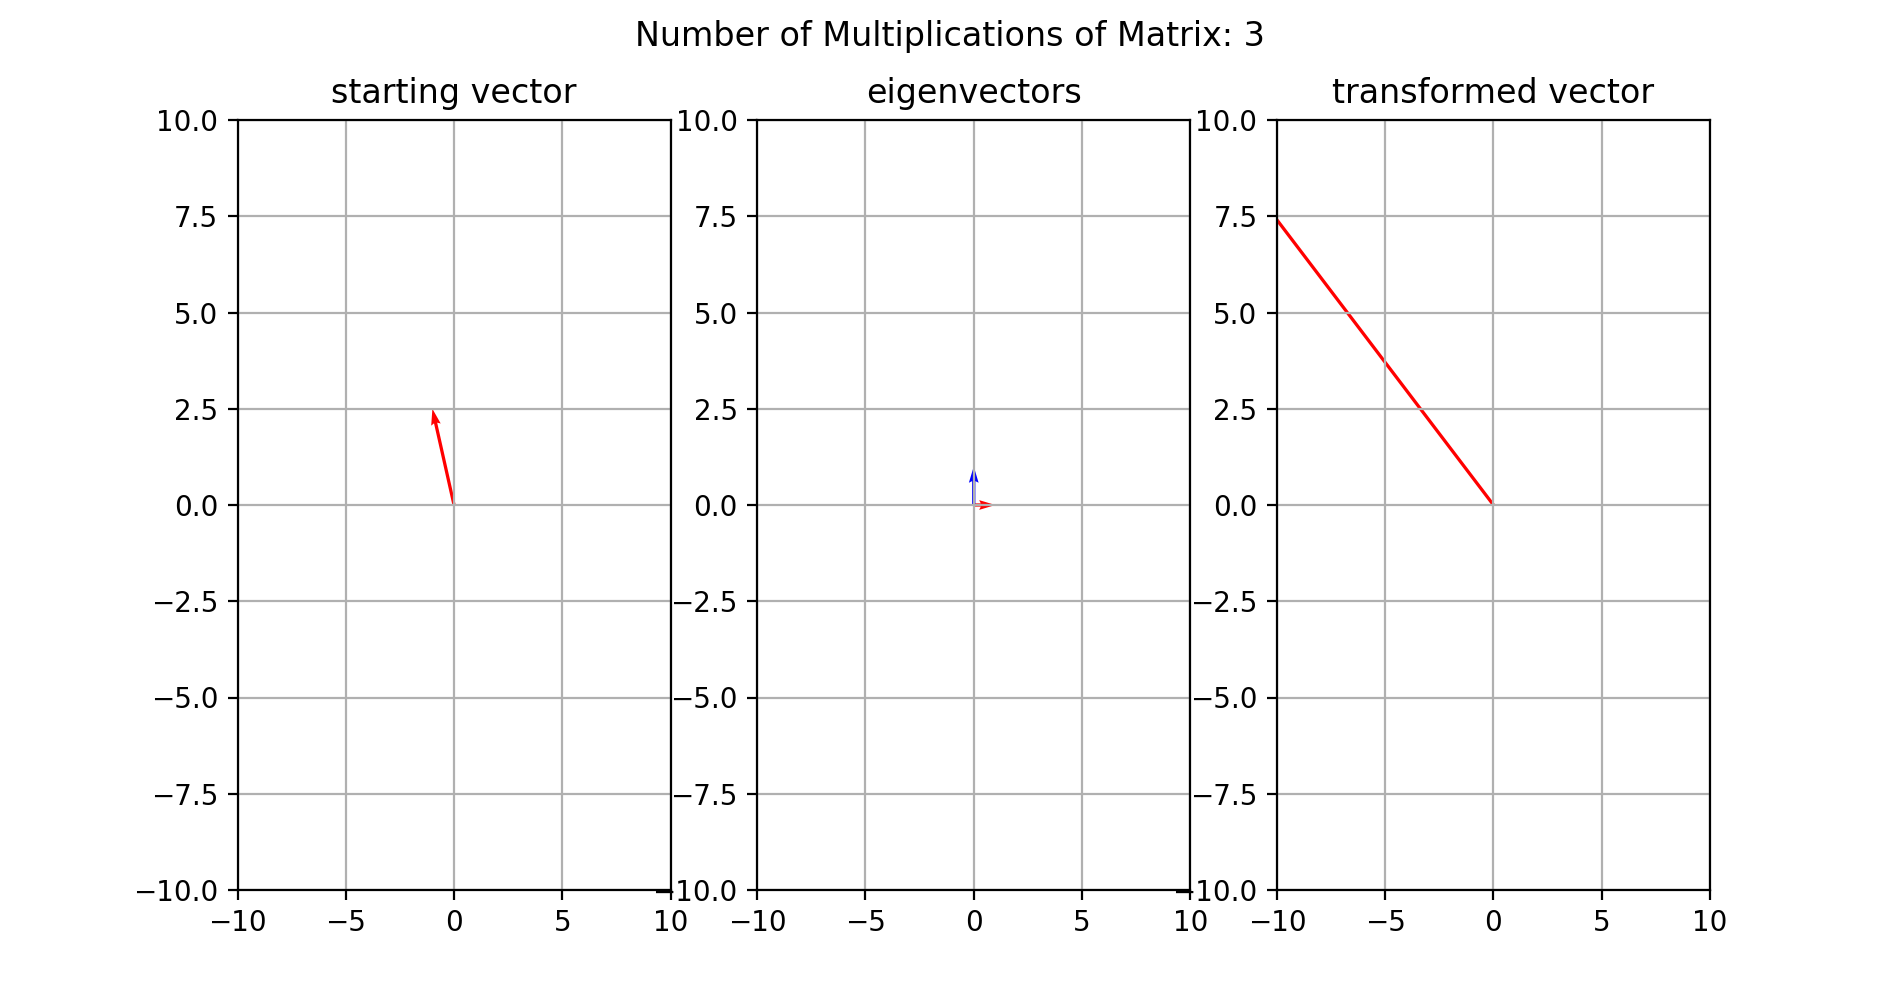

<IPython.core.display.Javascript object>


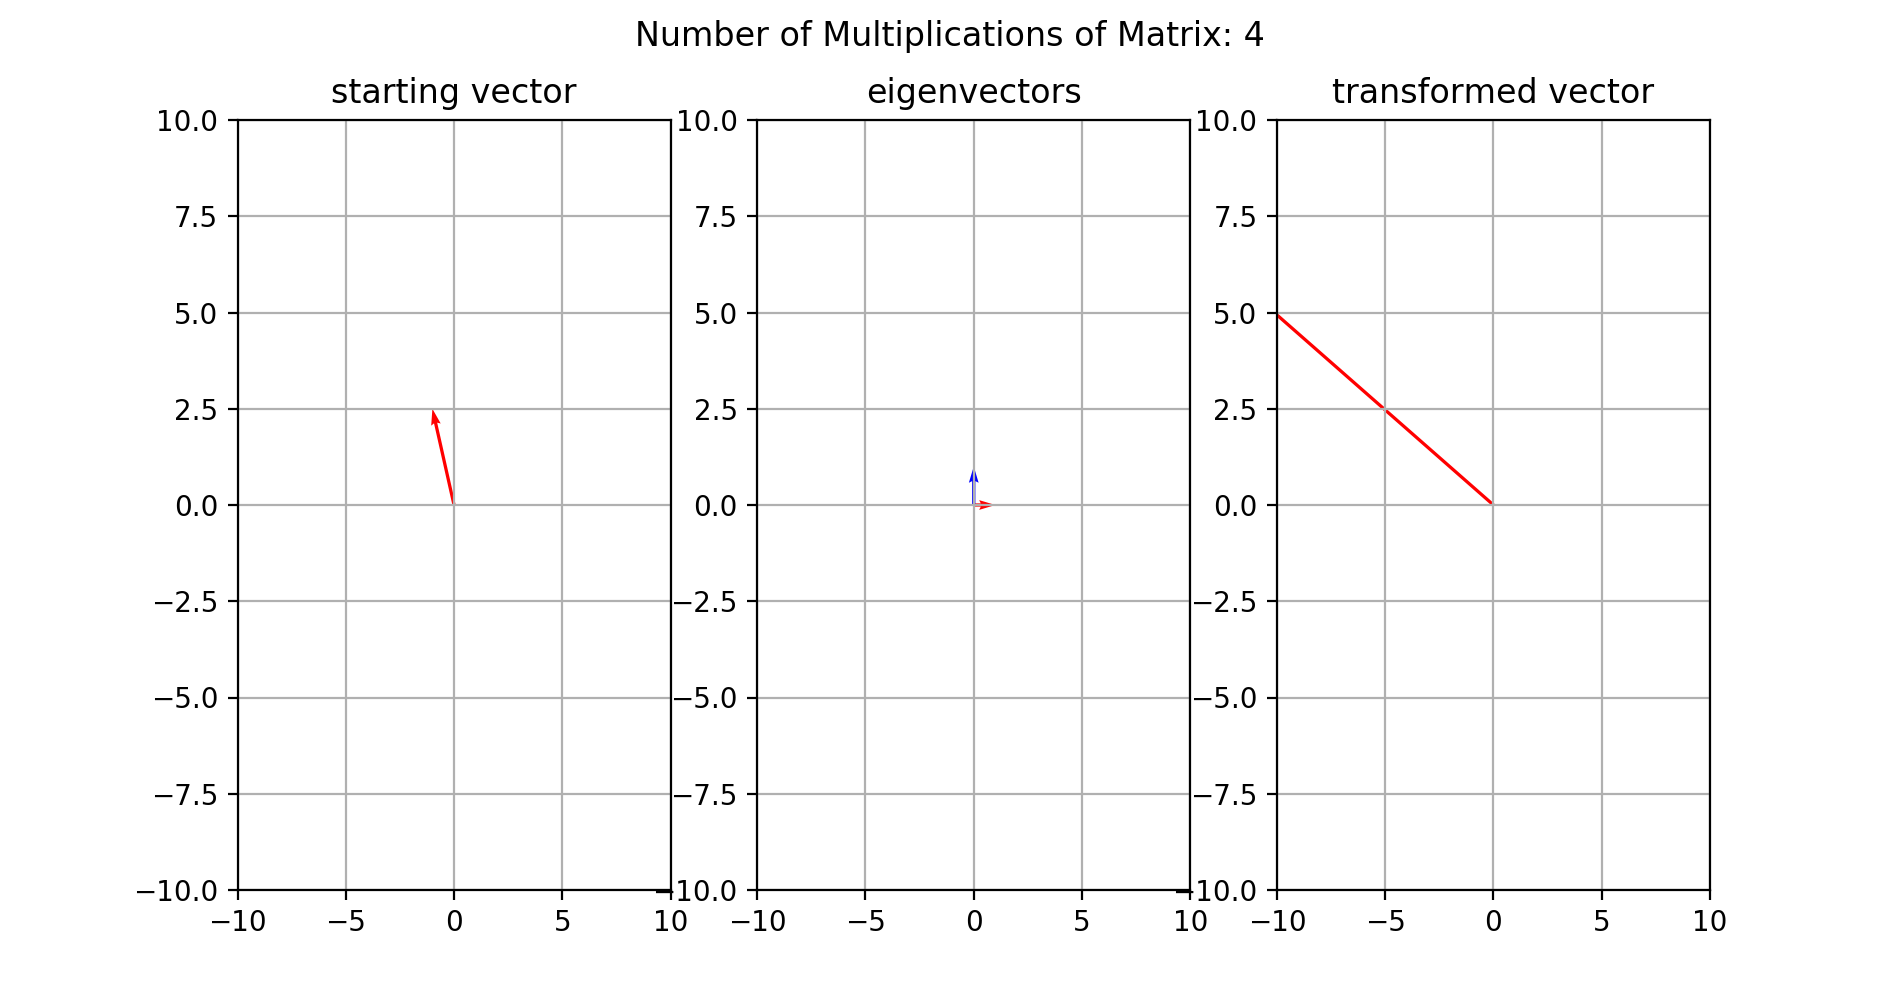

<IPython.core.display.Javascript object>


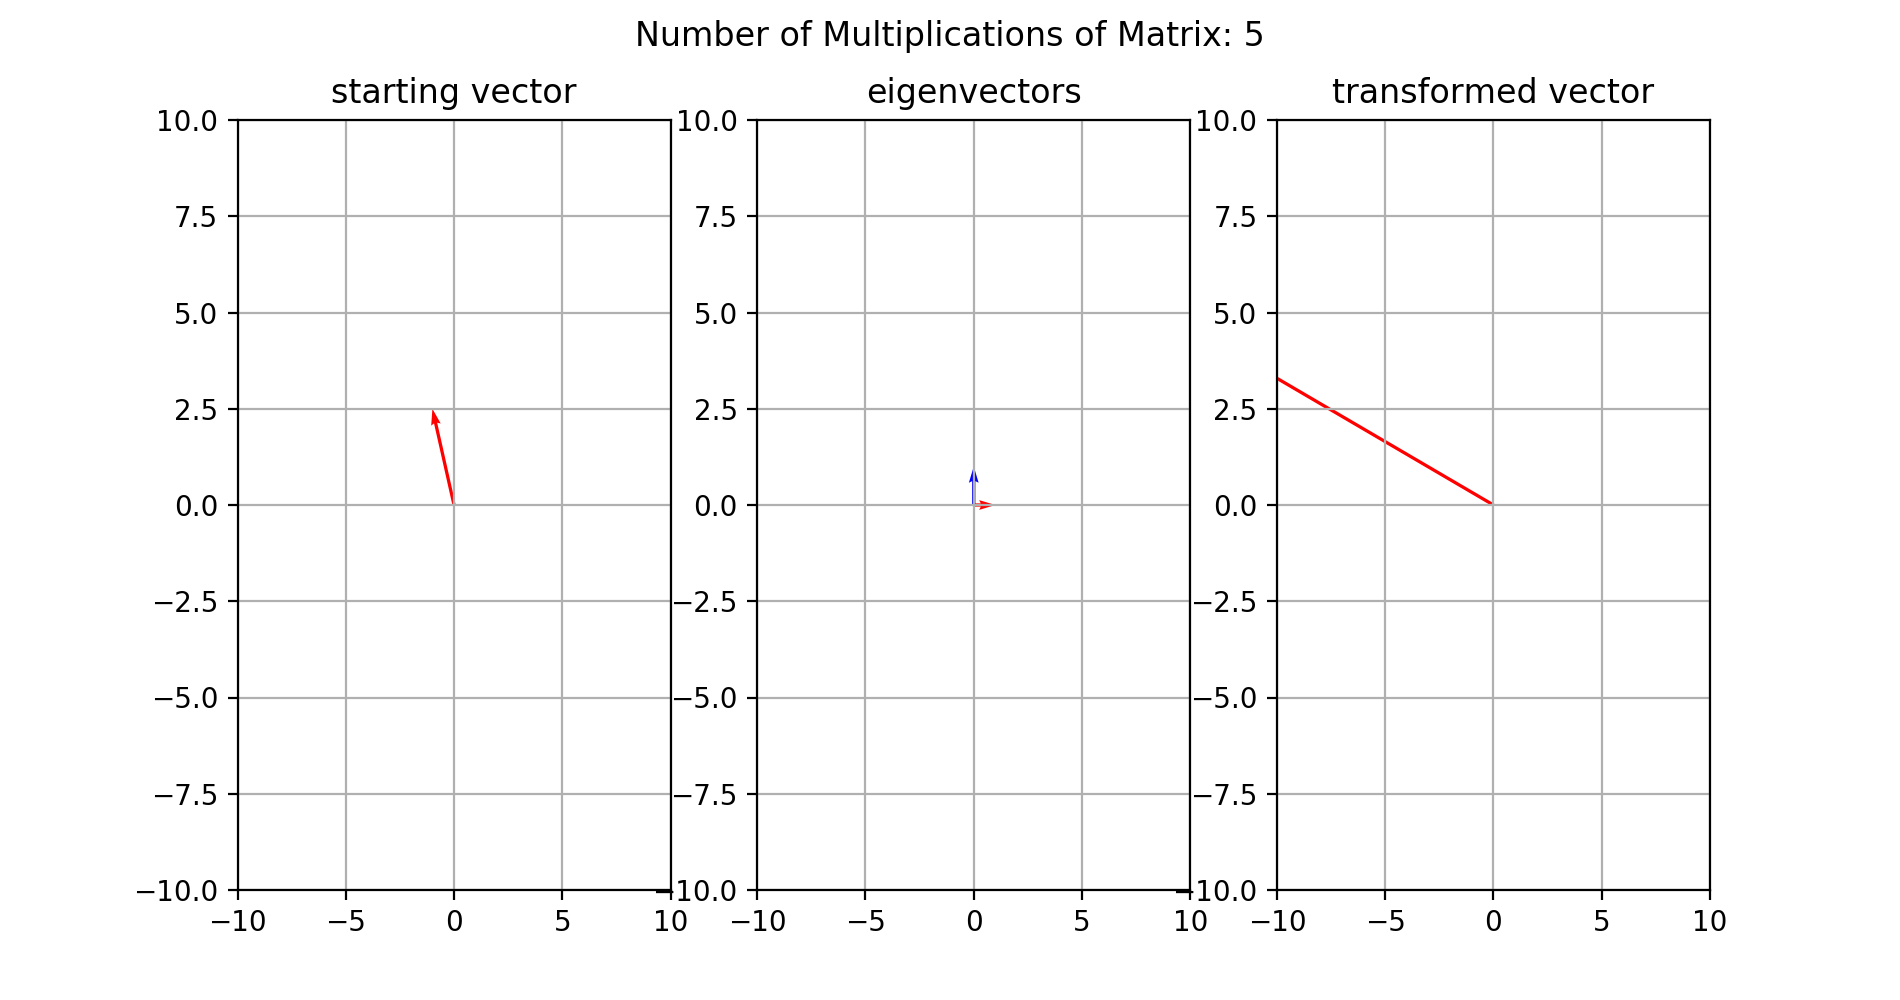

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
%matplotlib notebook
from IPython import display

plt.rcParams['axes.grid'] = True

#starting vector
vec = np.array([[-1],
                [2.5]])

#create matrix
mat = np.array(np.matrix(
    [[3, 0],
     [0, 2]]
))

#info collection
eigvals, eigvecs = np.linalg.eig(mat)
print(eigvals)
print(eigvecs)


#Plotting code
numMults = 5 
for i in range(1, numMults+1):
    powerMat = np.linalg.matrix_power(mat, i)
    transformedVec = np.matmul(powerMat, vec)
        
    origin = [0], [0] # origin point
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.5,5))
    fig.suptitle("Number of Multiplications of Matrix: {}".format(i))

    ax1.quiver(*origin, vec[0], vec[1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    ax2.quiver(*origin, eigvecs[:,0], eigvecs[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    ax3.quiver(*origin, transformedVec[0], transformedVec[1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    
    lower_x_lim = np.amin(transformedVec) - 2
    upper_x_lim = np.amax(transformedVec) + 2
    lower_y_lim = np.amin(transformedVec) - 2
    upper_y_lim = np.amax(transformedVec) + 2
    
    ax1.set_xlim([-10,10])
    ax1.set_ylim([-10,10])
    ax1.set_title('starting vector')
    
    ax2.set_xlim([-10,10])
    ax2.set_ylim([-10,10])
    ax2.set_title('eigenvectors')
    
    ax3.set_xlim([-10,10])
    ax3.set_ylim([-10,10])
    ax3.set_title('transformed vector')
    
    
plt.show()

In [19]:
from ipywidgets import interact
from IPython.display import display, Math, clear_output

# CONFIGURABLE:
vec = np.array([[-1],
                [2.5]])

mat = np.array(np.matrix(
    [[3, 0],
     [0, 2]]
))

SHOULD_UNITIZE = True # whether the transformed vector should be normalized in post-processing or not

# Compute eigenvectors & eigenvalues
eigvals, eigvecs = np.linalg.eig(mat)

@interact(mult_count=(0,20,1))
def show_iterated_matmul(mult_count=0):
    display(Math(r'\text{{Computing}}\  A^{{{}}} \vec{{v}}.'.format(mult_count)))
    powerMat = np.linalg.matrix_power(mat, mult_count)
    transformedVec = np.matmul(powerMat, vec)
    if SHOULD_UNITIZE:
        transformedVec = transformedVec / np.linalg.norm(transformedVec)

    origin = [0], [0] # origin point
    scale = 10 if not SHOULD_UNITIZE else 3
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9.5,5))
    fig.suptitle("Number of Multiplications of Matrix: {}".format(mult_count))

    ax1.quiver(*origin, vec[0], vec[1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    ax2.quiver(*origin, eigvecs[:,0], eigvecs[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    ax3.quiver(*origin, transformedVec[0], transformedVec[1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
    
    lower_x_lim = np.amin(transformedVec) - 2
    upper_x_lim = np.amax(transformedVec) + 2
    lower_y_lim = np.amin(transformedVec) - 2
    upper_y_lim = np.amax(transformedVec) + 2
    
    ax1.set_xlim([-scale,scale])
    ax1.set_ylim([-scale,scale])
    ax1.set_title('starting vector')
    
    ax2.set_xlim([-scale,scale])
    ax2.set_ylim([-scale,scale])
    ax2.set_title('eigenbasis')
    
    ax3.set_xlim([-scale,scale])
    ax3.set_ylim([-scale,scale])
    ax3.set_title('transformed vector{}'.format("" if not SHOULD_UNITIZE else " (normalized)"))
    
    plt.show()

interactive(children=(IntSlider(value=0, description='mult_count', max=20), Output()), _dom_classes=('widget-i…